## Regularized logistic regression

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

#### Visualizing the data

(118, 3)


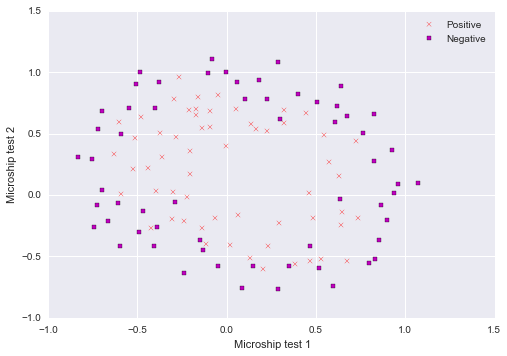

In [76]:
data = np.genfromtxt('ex2data2.txt', delimiter=',')

print(data.shape)

pos = data[data[:,-1]==1] # extract positive samples
neg = data[data[:,-1]==0] # extract negative samples

ax = plt.axes()
ax.scatter(pos[:,0], pos[:,1], c='r', marker="x", label='Positive');
ax.scatter(neg[:,0], neg[:,1], c='m', marker="s", label='Negative');
ax.set_xlabel("Microship test 1")
ax.set_ylabel("Microship test 2")
ax.legend();

In [77]:
from sklearn.preprocessing import PolynomialFeatures  

poly = PolynomialFeatures(6)
X = poly.fit_transform(data[:,[0,1]])

m, n  = X.shape[0], X.shape[1] - 1
y = data[:,-1]
theta = np.zeros( (n+1, 1) )
_lambda = 1

#### Sigmoid function

In [78]:
import scipy.special

def sigmoid(z):
    return scipy.special.expit(z)

### Cost Function and the Gradient

$ J(θ) = \frac{1}{m} \sum_{m=1}^{i} [1−y^{(i)} log(h_θ(x^{(i)})) − (1 − y^{(i)}) log(1 − h_θ(x^{(i)}))􏰄] + \frac{λ}{2m} \sum_{j=1}^{n} θ_j^2$

In [79]:
def cost_function(theta, X, y, _lambda):
    m = X.shape[0]
    h = sigmoid(X.dot( theta ))
    term1 = np.log( h ).T.dot( -y )
    term2 = np.log(1 - h).T.dot(1 - y)
    term3 = ( _lambda / (2*m) ) * theta
    return np.sum( ( term1 - term2 ) / m ) + np.sum( term3 )

def compute_gradient(theta, X, y, _lambda):
    m = X.shape[0]
    grad = X.T.dot( sigmoid( X.dot( theta ) ) - y ) / m
    grad[1:] = grad[1:] + ( (theta[1:] * _lambda ) / m )
    return grad

compute_gradient(theta, X, y, _lambda);
cost_function(theta, X, y, _lambda)

0.69314718055994529

### Learning the optimal parameters

In [80]:
import scipy.optimize #python equivalent of fminunc in Octave/Matlab

def findMinTheta( theta, X, y, _lambda ):
    result = scipy.optimize.minimize( cost_function, theta, args=(X, y, _lambda),  method='BFGS', options={"maxiter":500, "disp":True} )
    return result.x, result.fun

theta, cost = findMinTheta( theta, X , y, _lambda)

         Current function value: nan
         Iterations: 24
         Function evaluations: 1950
         Gradient evaluations: 65


In [ ]:
def predict(X, theta, binary=True):
    p = sigmoid( theta.dot( X ) )
    if binary:
        return 1 if p > 0.5 else 0
    else:
        return p

### Visualizing the decision boundary

In [ ]:
def plot_decision_function(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])